In [1]:
library(annotatr)
library(GenomicRanges)

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: 'generics'


The following objects are masked from 'package:base':

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The follo

In [2]:
annots <- c('hg19_cpgs', 'hg19_basicgenes', 'hg19_genes_firstexons', 'hg19_genes_intergenic')
annotations = build_annotations(genome = 'hg19', annotations = annots)

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




'select()' returned 1:1 mapping between keys and columns

Building promoters...

Building 1to5kb upstream of TSS...

Building intergenic...

Building 5UTRs...

Building 3UTRs...

Building exons...

Building first exons...

Building introns...

Building CpG islands...

loading from cache

Building CpG shores...

Building CpG shelves...

Building inter-CpG-islands...



In [3]:
dmCpG.CRC <- read.table("CRCdmCpG-actualpos.csv", header=TRUE, sep=",")
CRCgr <- makeGRangesFromDataFrame(dmCpG.CRC,
                               seqnames.field="chr",
                               start.field="start",
                               end.field="end",
                               strand.field="strand"
                               )

mcols(CRCgr)$meth.diff <- dmCpG.CRC$meth.diff
annotatedCRC <- annotate_regions(
      regions=CRCgr,
  annotations=annotations,
  ignore.strand=TRUE,
  minoverlap=1L
)



dmCpG.STAD <- read.table("STADdmCpG-actualpos.csv", header=TRUE, sep=",")
STADgr <- makeGRangesFromDataFrame(dmCpG.STAD,
                               seqnames.field="chr",
                               start.field="start",
                               end.field="end",
                               strand.field="strand"
                               )

mcols(STADgr)$meth.diff <- dmCpG.STAD$meth.diff
annotatedSTAD <- annotate_regions(
      regions=STADgr,
  annotations=annotations,
  ignore.strand=TRUE,
  minoverlap=1L
)

Annotating...

Annotating...



In [4]:
annsum = summarize_annotations(
    annotated_regions = annotatedCRC,
    quiet = TRUE)
print(annsum)

# A tibble: 12 × 2
   annot.type                n
   <chr>                 <int>
 1 hg19_cpg_inter          174
 2 hg19_cpg_islands         26
 3 hg19_cpg_shelves          5
 4 hg19_cpg_shores          22
 5 hg19_genes_1to5kb         5
 6 hg19_genes_3UTRs          1
 7 hg19_genes_5UTRs          9
 8 hg19_genes_exons         20
 9 hg19_genes_firstexons    18
10 hg19_genes_intergenic   183
11 hg19_genes_introns       15
12 hg19_genes_promoters     27


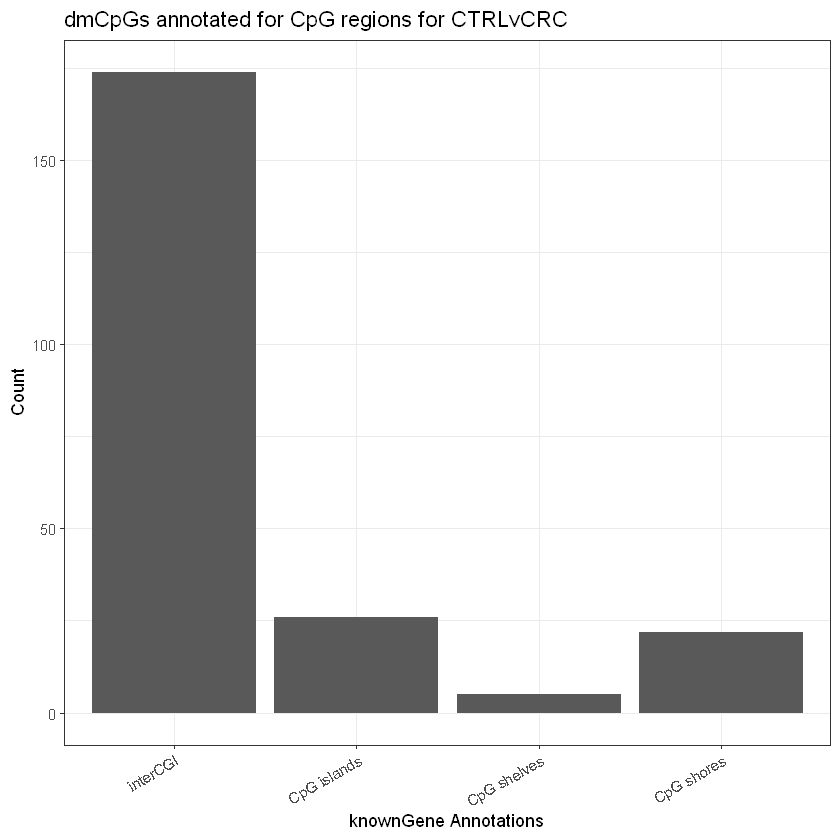

In [5]:
annots_order = c(
    'hg19_cpg_inter',
    'hg19_cpg_islands',
    'hg19_cpg_shelves',
    'hg19_cpg_shores')

CRCdm_annotations = plot_annotation(
    annotated_regions = annotatedCRC,
    annotation_order = annots_order,
    plot_title = 'dmCpGs annotated for CpG regions for CTRLvCRC',
    x_label = 'knownGene Annotations',
    y_label = 'Count')
print(CRCdm_annotations)

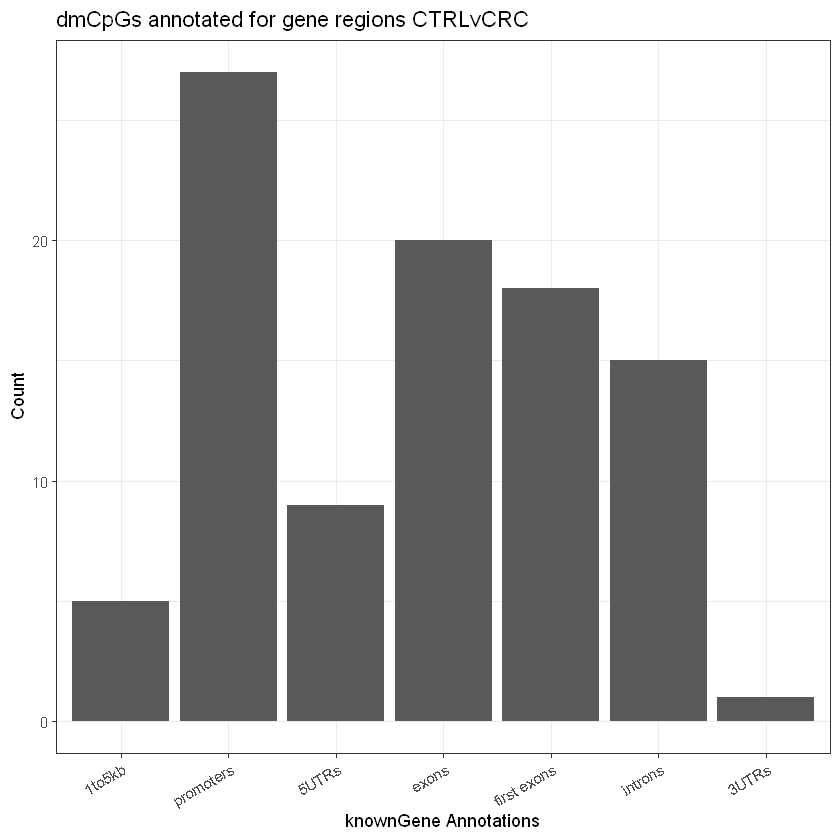

In [6]:
annots_order = c(
    'hg19_genes_1to5kb',
    'hg19_genes_promoters',
    'hg19_genes_5UTRs',
    'hg19_genes_exons',
    'hg19_genes_firstexons',
    'hg19_genes_introns',
    'hg19_genes_3UTRs')

CRCdm_annotations = plot_annotation(
    annotated_regions = annotatedCRC,
    annotation_order = annots_order,
    plot_title = 'dmCpGs annotated for gene regions CTRLvCRC',
    x_label = 'knownGene Annotations',
    y_label = 'Count')
print(CRCdm_annotations)

In [7]:
annsum = summarize_annotations(
    annotated_regions = annotatedSTAD,
    quiet = TRUE)
print(annsum)

# A tibble: 11 × 2
   annot.type                n
   <chr>                 <int>
 1 hg19_cpg_inter          321
 2 hg19_cpg_islands        118
 3 hg19_cpg_shelves          4
 4 hg19_cpg_shores          38
 5 hg19_genes_1to5kb        26
 6 hg19_genes_5UTRs          9
 7 hg19_genes_exons         52
 8 hg19_genes_firstexons    41
 9 hg19_genes_intergenic   342
10 hg19_genes_introns       71
11 hg19_genes_promoters     35


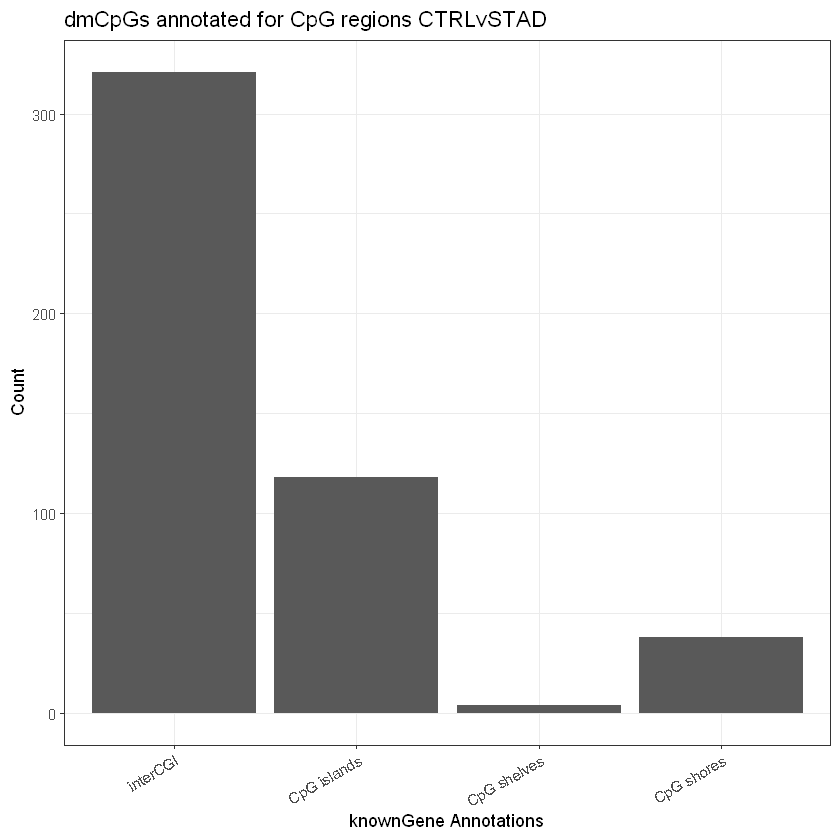

In [8]:
annots_order = c(
    'hg19_cpg_inter',
    'hg19_cpg_islands',
    'hg19_cpg_shelves',
    'hg19_cpg_shores')

STADdm_annotations = plot_annotation(
    annotated_regions = annotatedSTAD,
    annotation_order = annots_order,
    plot_title = 'dmCpGs annotated for CpG regions CTRLvSTAD',
    x_label = 'knownGene Annotations',
    y_label = 'Count')
print(STADdm_annotations)

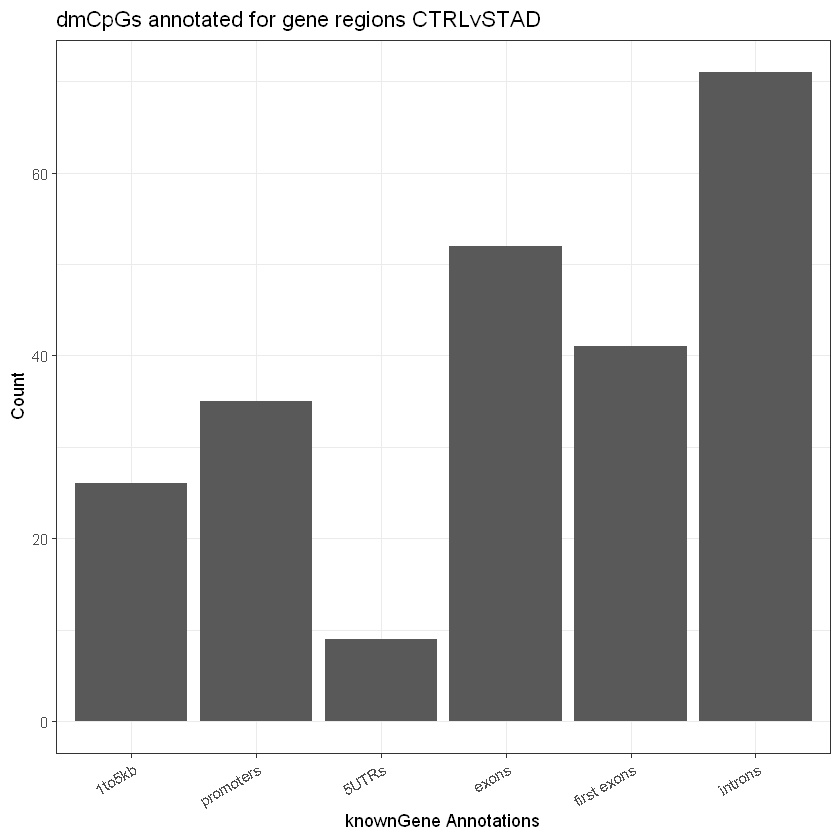

In [9]:
annots_order = c(
    'hg19_genes_1to5kb',
    'hg19_genes_promoters',
    'hg19_genes_5UTRs',
    'hg19_genes_exons',
    'hg19_genes_firstexons',
    'hg19_genes_introns')

STADdm_annotations = plot_annotation(
    annotated_regions = annotatedSTAD,
    annotation_order = annots_order,
    plot_title = 'dmCpGs annotated for gene regions CTRLvSTAD',
    x_label = 'knownGene Annotations',
    y_label = 'Count')
print(STADdm_annotations)

In [10]:
write.table(annotatedCRC, "CRCannotated.tsv")
write.table(annotatedSTAD, "STADannotated.tsv")

In [11]:
annots <- c('hg19_genes_promoters', 'hg19_genes_firstexons')
annotations = build_annotations(genome = 'hg19', annotations = annots)

'select()' returned 1:1 mapping between keys and columns

Building promoters...

Building exons...

Building first exons...

Building introns...



In [12]:
mcols(CRCgr)$meth.diff <- dmCpG.CRC$meth.diff
annotatedCRC.promoters.firstexons <- annotate_regions(
      regions=CRCgr,
  annotations=annotations,
  ignore.strand=TRUE,
  minoverlap=1L
)

mcols(STADgr)$meth.diff <- dmCpG.STAD$meth.diff
annotatedSTAD.promoters.firstexons <- annotate_regions(
      regions=STADgr,
  annotations=annotations,
  ignore.strand=TRUE,
  minoverlap=1L
)

Annotating...

Annotating...



In [13]:
write.table(annotatedCRC.promoters.firstexons, "CRCannotated-promotersfirstexons.tsv")
write.table(annotatedSTAD.promoters.firstexons, "STADannotated-promotersfirstexons.tsv")